In [1]:
import pandas as pd

df = pd.read_csv('global_youtube_statistics.csv', encoding='unicode_escape')
df.tail(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
985,986,TKOR,12400000,3.392023e+09,Education,TKoR,0,NaN,NaN,People,...,NaN,2006.0,Aug,16.0,NaN,NaN,NaN,NaN,NaN,NaN
986,987,ANNA KOVA,12400000,1.395959e+10,People & Blogs,annakova,1,NaN,NaN,Film,...,NaN,2006.0,Jun,18.0,NaN,NaN,NaN,NaN,NaN,NaN
987,988,Avril Lavigne,12400000,6.202090e+09,Music,Avril Lavigne,205,United States,US,Music,...,NaN,2005.0,Oct,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
988,989,Caylus,12400000,4.779140e+09,Education,Caylus,1340,United States,US,Games,...,400000.0,2016.0,Apr,6.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501
994,995,Make Joke Of,12300000,2.129774e+09,Comedy,Make Joke Of,62,India,IN,Comedy,...,100000.0,2017.0,Aug,1.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
class DataPreprocessing:
    def __init__(self, data_path) -> None:
        self.df = pd.read_csv(data_path, encoding='unicode_escape') 
    
    def extract_features(self):
        print('-----------------------------------------------')
        print('----- print 5 first rows of Data -------')
        print(self.df.head(5))
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- Descriptive Statistical Measures of Data -------')
        print(self.df.describe())
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- Summary of Data Frame -------')
        print(self.df.info())
        print('-----------------------------------------------')


        print('-----------------------------------------------')
        print('----- number of rows and columns of Data ---- ')
        print(self.df.shape)
        print('-----------------------------------------------')

        print('-----------------------------------------------')
        print('----- columns name ---- ')
        print(list(self.df.columns))
        print('-----------------------------------------------')

    def handle_missing_values(self, strategy='mean'):
        if strategy == 'mean':
            self.df.fillna(self.df.mean(), inplace=True)
        elif strategy == 'median':
            self.df.fillna(self.df.median(), inplace=True)
        elif strategy == 'mode':
            self.df.fillna(self.df.mode().iloc[0], inplace=True)
        elif strategy == 'drop':
            self.df.dropna(inplace=True)
        else:
            raise ValueError(f"Unknown strategy {strategy}")
        
    
data_preprocess = DataPreprocessing('global_youtube_statistics.csv')
data_preprocess.extract_features()


-----------------------------------------------
----- print 5 first rows of Data -------
   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series    245000000  2.280000e+11   
1     2              YouTube Movies    170000000  0.000000e+00   
2     3                     MrBeast    166000000  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4     5                   SET India    159000000  1.480000e+11   

           category                       Title  uploads        Country  \
0             Music                    T-Series    20082          India   
1  Film & Animation               youtubemovies        1  United States   
2     Entertainment                     MrBeast      741  United States   
3         Education  Cocomelon - Nursery Rhymes      966  United States   
4             Shows                   SET India   116536          India   

  Abbreviation   channel_type  ...  subscribers_for_last_30_day

# 1. 10 channels with the most subscribers

In [6]:
import matplotlib.pyplot as plt

def plot_histogram(x, y, color, xlabel, ylabel, title, rotation):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=rotation)
        plt.show()

def plot_histogram_horizontal(x, y, color, xlabel, ylabel, title, rotation):
        plt.barh(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()

def plot_multiple_bar(x, y1, y2, xlabel, ylabel, xticks, legend, title, rotation):
        bar_width = 0.2
        plt.bar(x - bar_width, y1, bar_width, color='cyan')
        plt.bar(x, y2, bar_width, color='red')

        plt.xticks(x, xticks, rotation = rotation )
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.legend(legend)
        plt.title(title)
        plt.show()

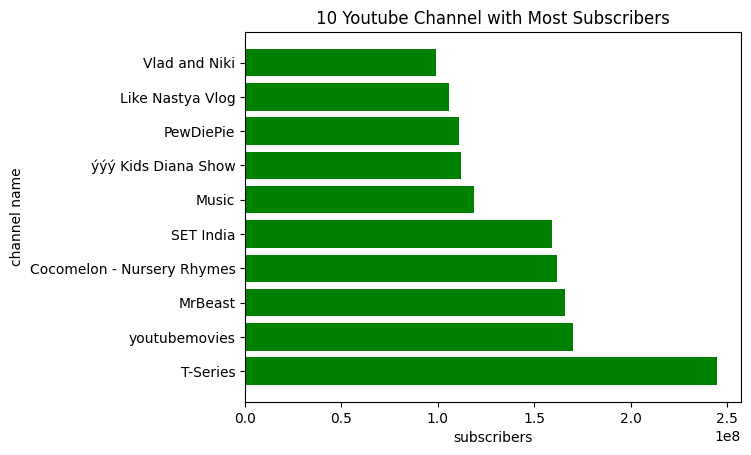

In [8]:
df_sorted = df.sort_values(by=['subscribers'],  ascending=False)

plot_histogram_horizontal(  x = df_sorted['Title'][0:10],
                            y = df_sorted['subscribers'][0:10],
                            color = 'green',
                            xlabel = 'subscribers',
                            ylabel = 'channel name',
                            title = '10 Youtube Channel with Most Subscribers',
                            rotation = 0
                        )



# 2. 10 Channels with Least Subscribers

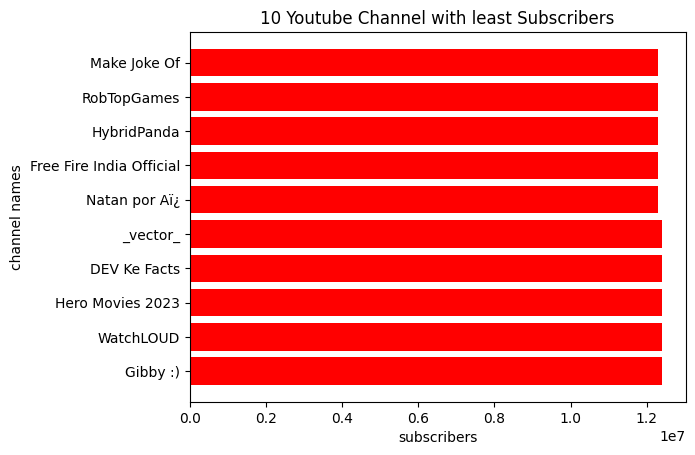

In [9]:
plot_histogram_horizontal(x = df_sorted['Title'].tail(10),
                          y = df_sorted['subscribers'].tail(10),
                          color = 'red',
                          xlabel = 'subscribers',
                          ylabel = 'channel names',
                          title = '10 Youtube Channel with least Subscribers',
                          rotation = 0
                        )

# 3. 10 most-viewed YouTube channels

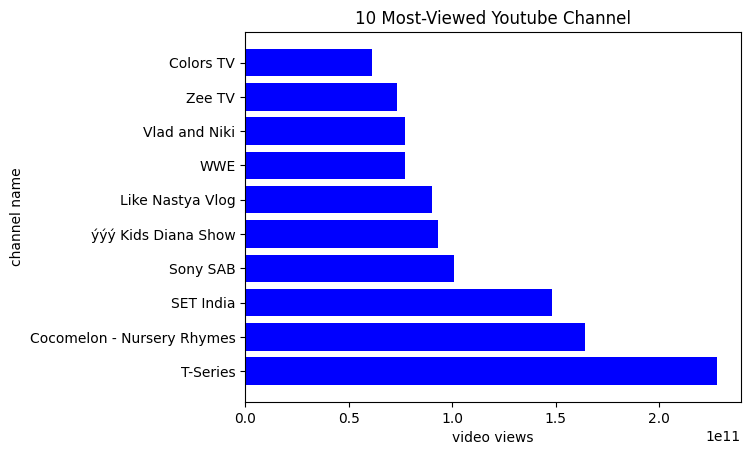

In [11]:
df_sorted = df.sort_values(by=['video views'],  ascending=False)
plot_histogram_horizontal(  x = df_sorted['Title'][0:10],
                            y = df_sorted['video views'][0:10],
                            color = 'blue',
                            xlabel = 'video views',
                            ylabel = 'channel name',
                            title = '10 Most-Viewed Youtube Channel',
                            rotation = 0
                        )


# 4. Number of Channels belong to each Category

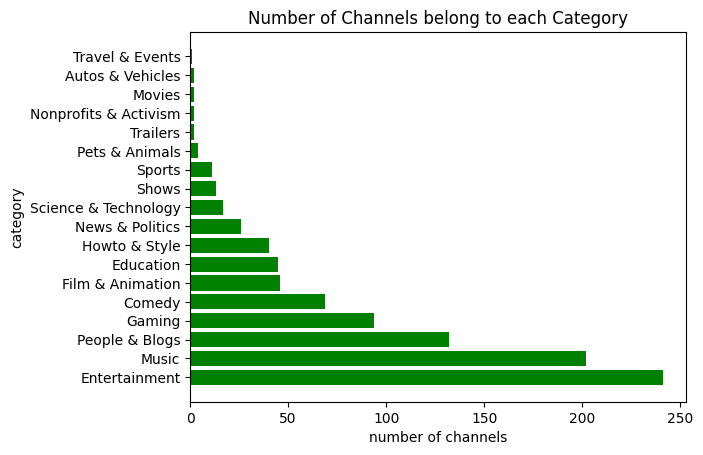

In [12]:
channels_per_category = df['category'].value_counts()
plot_histogram_horizontal(x = channels_per_category.index,
               y = channels_per_category.values,
               color = 'green',
               xlabel = 'number of channels',
               ylabel = 'category',
               title = 'Number of Channels belong to each Category',
               rotation = 90
                       )

# 5. 10 channels with the most upload and regarding number of subcribers of those same 10 channels

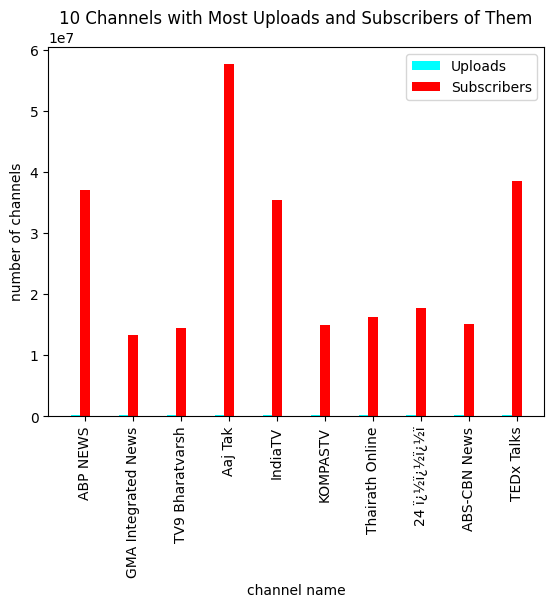

In [14]:
import numpy as np
df_sorted = df.sort_values(by=['uploads'],  ascending=False)
x = np.arange(10)

plot_multiple_bar(x = x,
                  y1 = df_sorted ['uploads'] [0:10],
                  y2 = df_sorted ['subscribers'] [0:10],
                  xlabel = 'channel name',
                  ylabel = 'number of channels',
                  xticks =  df_sorted['Title'][0:10],
                  legend = ['Uploads', 'Subscribers'],
                  title = '10 Channels with Most Uploads and Subscribers of Them',
                  rotation = 90
                          )

# 6. Number of Channels per Country

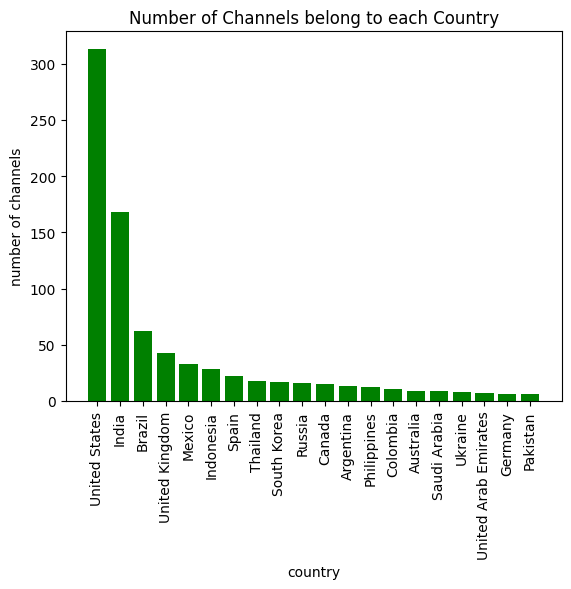

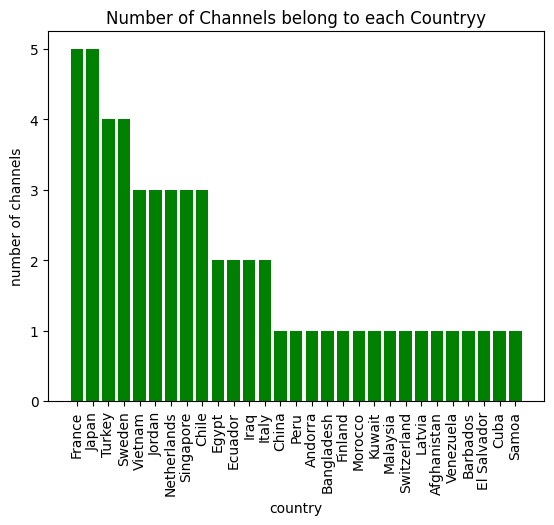

In [15]:
channels_per_country = df['Country'].value_counts()
part1 = channels_per_country[0:20]
part2 = channels_per_country[20:]

plot_histogram(x = part1.index,
               y = part1.values,
               color = 'green',
               xlabel = 'country',
               ylabel = 'number of channels',
               title = 'Number of Channels belong to each Country',
               rotation = 90
                )

plot_histogram(x = part2.index,
               y = part2.values,
               color = 'green',
               xlabel = 'country',
               ylabel = 'number of channels',
               title = 'Number of Channels belong to each Countryy',
               rotation = 90
                )

# 7. Number of Channels created per Year

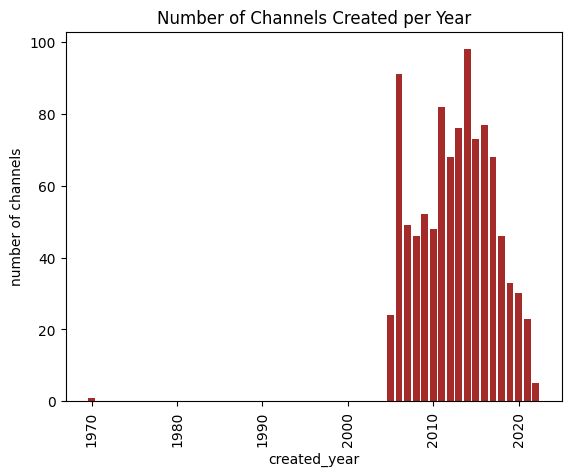

In [16]:
channels_per_year = df['created_year'].value_counts()
plot_histogram(x = channels_per_year.index,
               y = channels_per_year.values,
               color = 'brown',
               xlabel = 'created_year',
               ylabel = 'number of channels',
               title = 'Number of Channels Created per Year',
               rotation = 90
                )
               

# 8.  the location of the top 20 with the highest yearly earning in  a world map

In [17]:
import pandas as pd
import folium
import matplotlib.colors as mcolors
import branca.colormap as cm


df = df.fillna(0)
df_sorted = df.sort_values(by='highest_yearly_earnings', ascending=False)
df_highly_earnings =  df_sorted.iloc[0:20,:]


# Create a folium map centered on the average latitude and longitude
map_center = [df_highly_earnings['Latitude'].mean(), df_highly_earnings['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=2)

colormap = cm.LinearColormap(colors=['yellow','orange','red'], vmin=0, vmax=3, caption='Value')

# Define a function to get a color from the colormap
def get_marker_color(value):
    return colormap(value)

# Add markers for each location
for idx, row in df_highly_earnings.iterrows():
    html = f"""
    <h4>{row['Title']}</h4>
    <p><b>latitude:</b>{row['Latitude']}</p>
    <p><b>longitude:</b> {row['Longitude']}</p>
    <p><b>highest_yearly_earnings:</b> {row['highest_yearly_earnings']}</p>
    """
    iframe = folium.IFrame(html=html, width=200, height=150)
    popup = folium.Popup(iframe, max_width=250)

    marker_color = get_marker_color(row['highest_yearly_earnings'])
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup,
        icon=folium.Icon(color='white', icon_color=marker_color, icon='info-sign')
    ).add_to(mymap)

colormap.caption = 'earning'
colormap.add_to(mymap)


# Display the map
mymap

# Modular Coding

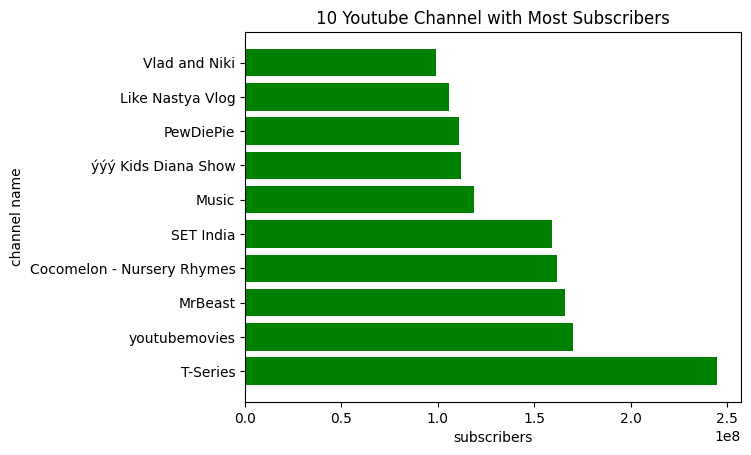

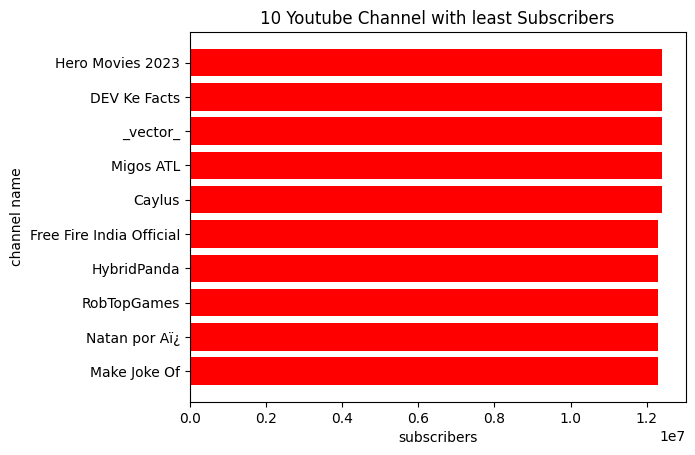

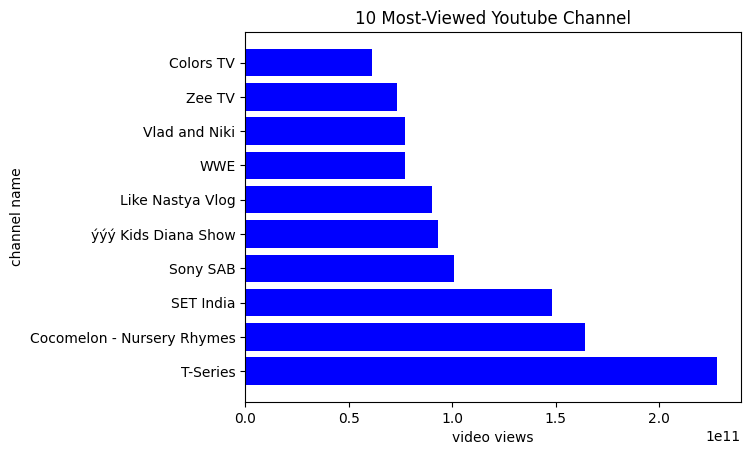

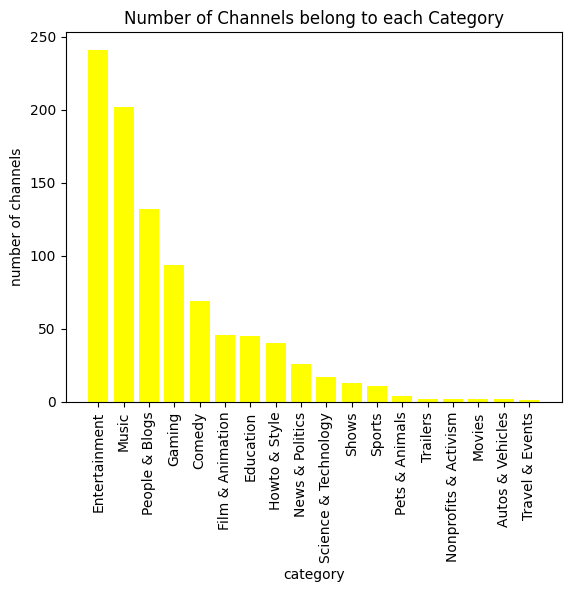

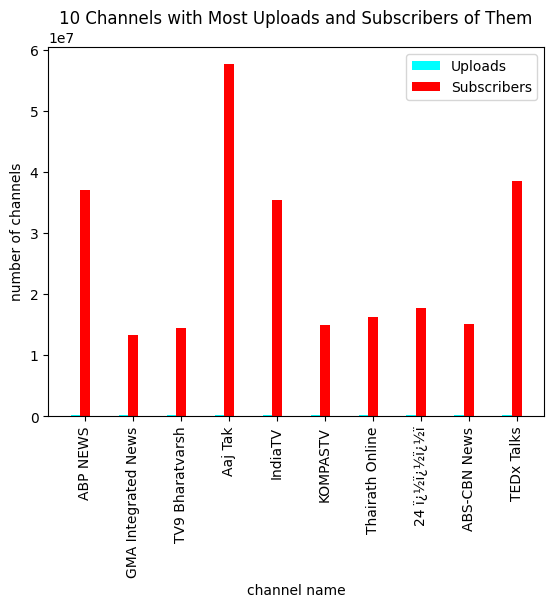

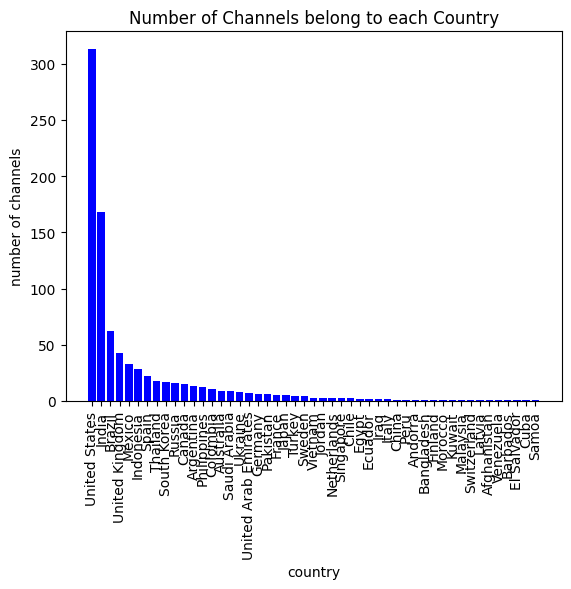

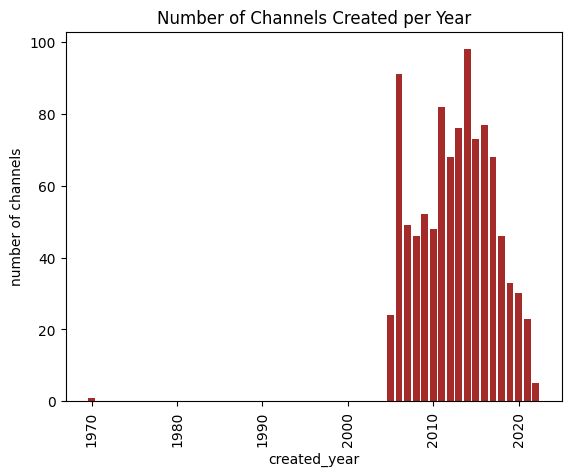

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import matplotlib.colors as mcolors
import branca.colormap as cm

class YoutubeChannels:
    def __init__(self, data_path) -> None:
        self.df = pd.read_csv(data_path, encoding='unicode_escape')
        
    def plot_histogram(self, x, y, color, xlabel, ylabel, title, rotation):
        plt.bar(x, y, color=color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.xticks(rotation=rotation)
        plt.show()
           
    def plot_histogram_horizontal(self,x, y, color, xlabel, ylabel, title):
            plt.barh(x, y, color=color)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.title(title)
            plt.show()

    def plot_multiple_bar(self,x, y1, y2, xlabel, ylabel, xticks, legend, title, rotation):
            bar_width = 0.2
            plt.bar(x - bar_width, y1, bar_width, color='cyan')
            plt.bar(x, y2, bar_width, color='red')
            plt.xticks(x, xticks, rotation = rotation )
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)
            plt.legend(legend)
            plt.title(title)
            plt.show()

    def sort_dataframe(self, sort_filter, sort_type):
        return self.df.sort_values(by=[sort_filter], ascending=sort_type)

    def filter_channels(self, filter_type, sort_type, color, xlabel, ylabel , title, num = 10):
        df_sorted = self.sort_dataframe(filter_type,sort_type)
        self.plot_histogram_horizontal(x = df_sorted['Title'][0:num],
                                       y = df_sorted[filter_type][0:num],
                                       color = color,
                                       xlabel = xlabel,
                                       ylabel = ylabel,
                                       title = title
                                                )
        
    def statistics_channels(self, filter_type, color, xlabel, ylabel, title, rotation):
        statistic_channel = self.df[filter_type].value_counts()
        self.plot_histogram(x = statistic_channel.index,
                            y = statistic_channel.values,
                            color = color,
                            xlabel = xlabel,
                            ylabel = ylabel,
                            title = title,
                            rotation = rotation
                                        )
    
    def statistics_channels_doublebar(self, filter_type1, filter_type2, xlabel, ylabel, title, legend, rotation, sort_type = False, num = 10):
        df_sorted = self.sort_dataframe(sort_filter = filter_type1, sort_type =sort_type)
        x = np.arange(num)

        self.plot_multiple_bar(x = x,
                               y1 = df_sorted [filter_type1] [0:num],
                               y2 = df_sorted [filter_type2] [0:num],
                               xlabel = xlabel,
                               ylabel = ylabel,
                               xticks=  df_sorted['Title'][0:num],
                               legend = legend,
                               title = title,
                               rotation = rotation
                                )
    
    def get_marker_color(self, value, colormap):
        return colormap(value)

    def location_channels(self, filter_type, num = 20, sort_type = False):
        df_sorted = self.sort_dataframe(filter_type, sort_type)
        df_sorted = df_sorted.fillna(0)
        df_highly_earnings =  df_sorted.iloc[0:num,:]

        # Create a folium map centered on the average latitude and longitude
        map_center = [df_highly_earnings['Latitude'].mean(), df_highly_earnings['Longitude'].mean()]
        mymap = folium.Map(location=map_center, zoom_start=2)

        colormap = cm.LinearColormap(colors=['yellow','orange','red'], vmin=0, vmax=3, caption='Value')

        # Add markers for each location
        for _, row in df_highly_earnings.iterrows():
            html = f"""
            <h4>{row['Title']}</h4>
            <p><b>latitude:</b>{row['Latitude']}</p>
            <p><b>longitude:</b> {row['Longitude']}</p>
            <p><b>highest_yearly_earnings:</b> {row[filter_type]}</p>
            """
            iframe = folium.IFrame(html=html, width=200, height=150)
            popup = folium.Popup(iframe, max_width=250)

            marker_color = self.get_marker_color(row[filter_type], colormap)
            folium.Marker(
                location=[row['Latitude'], row['Longitude']],
                popup=popup,
                icon=folium.Icon(color='white', icon_color=marker_color, icon='info-sign')
            ).add_to(mymap)

        colormap.caption = filter_type
        colormap.add_to(mymap)


        # Display the map
        mymap.show_in_browser()


if __name__ == '__main__':
      
      youtube = YoutubeChannels('global_youtube_statistics.csv')

      youtube.filter_channels(filter_type = 'subscribers',
                              sort_type = False,
                              color =  'green',
                              xlabel = 'subscribers',
                              ylabel = 'channel name',
                              title = '10 Youtube Channel with Most Subscribers'
                              )
      
      youtube.filter_channels(filter_type = 'subscribers',
                              sort_type = True,
                              color =  'red',
                              xlabel = 'subscribers',
                              ylabel = 'channel name',
                              title = '10 Youtube Channel with least Subscribers'
                              )
       
      youtube.filter_channels(filter_type = 'video views',
                              sort_type = False,
                              color =  'blue',
                              xlabel = 'video views',
                              ylabel = 'channel name',
                              title = '10 Most-Viewed Youtube Channel')
      
      youtube.statistics_channels(filter_type = 'category',
                                  color = 'yellow',
                                  xlabel = 'category',
                                  ylabel = 'number of channels',
                                  title = 'Number of Channels belong to each Category',
                                  rotation = 90
                                  )
      
      youtube.statistics_channels_doublebar(filter_type1 = 'uploads',
                                            filter_type2 = 'subscribers',
                                            xlabel = 'channel name',
                                            ylabel = 'number of channels',
                                            legend = ['Uploads', 'Subscribers'],
                                            title = '10 Channels with Most Uploads and Subscribers of Them',
                                            rotation = 90
                                            )
      
      youtube.statistics_channels(filter_type = 'Country',
                                  color = 'blue',
                                  xlabel = 'country',
                                  ylabel = 'number of channels',
                                  title = 'Number of Channels belong to each Country',
                                  rotation = 90
                                  )
      
      youtube.statistics_channels(filter_type = 'created_year',
                                  color = 'brown',
                                  xlabel = 'created_year',
                                  ylabel = 'number of channels',
                                  title = 'Number of Channels Created per Year',
                                  rotation = 90
                                  )

      youtube.location_channels('highest_yearly_earnings') 

       
        